In [162]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.spatial import distance
from d3s import observables, domain, systems, kernels, algorithms


def gramian(X, sigma):
    return np.exp(-distance.squareform(distance.pdist(X.T, 'sqeuclidean'))/(2*sigma**2))
def gramian2(X, Y, sigma=np.sqrt(2)):
    return np.exp(-distance.cdist(X.T, Y.T, 'sqeuclidean')/(2*sigma**2))

if __name__=="__main__":
    #generate data

    bounds = np.array([[-20, 20], [-20, 20], [-20, 20]])
    boxes = np.array([20, 20, 20])
    Omega = domain.discretization(bounds, boxes)
    sigma = np.sqrt(2)
    f = systems.Hydrogen(1e-3, 10000)
    np.random.seed(seed=233423)
    m = 600
    X = np.random.randn(3, m)
    r = 20*np.random.rand(m)**(1/3)
    for i in range(m):
        X[:, i] = r[i]*X[:, i]/np.linalg.norm(X[:, i])
    Y = f(X)
    
    """
    bounds = np.array([[-5, 5]])
    boxes = np.array([100])
    Omega = domain.discretization(bounds, boxes)

    #%% define system
    h  = 1
    m0 = 1
    omega = 1

    def c0(x):
        return m0*omega**2*x**2/2

    def c2(x):
        return -h**2/(2*m0)

    #%% generate data
    m = 100
    X = Omega.rand(m)
    A = np.zeros((m, m))
    k = kernels.gaussianKernel(1)
    for i in range(m):
        for j in range(m):
            A[i, j] = c0(X[:, i]) * k(X[:, i], X[:, j]) + np.sum( c2(X[:, i]) * k.ddiff(X[:, i], X[:, j]), axis=(0,1) )
    """
    
    #compute gramian, G_hat, A_hat
    G = gramian(X, sigma)
    A = gramian2(X, Y, sigma).T
    
    #eigenvalue decomposition, G_hat = V*S^2*V(inv)
    d, Q = np.linalg.eig(G)
    S_2 = np.diag(d)
    S = sp.linalg.sqrtm(S_2)
    
    #compute K_hat
    S_pinv = np.linalg.pinv(S)
    K = S_pinv @ Q.T @ A @ Q @ S_pinv
    S_r = S_2 @ S_pinv
    d, V = np.linalg.eig(K)
    
    eigenfunctions = Q @ S_r @ V
    sortinds = np.argsort(d)
    eigenfunctions = eigenfunctions[:,sortinds]
    d = d[sortinds]

In [164]:
#plot eigenfunctions
    # parameters of the grid
W = eigenfunctions
grid = Omega.midpointGrid()
W = gramian2(grid, X) @ V

ind, = np.where(abs(d) > 0.1)
for i in ind[-6:]:
    plt.figure(figsize=(4, 3))
    Omega.plot(np.real(W[:, i]/np.amax(abs(W[:, i]))))
    plt.ylim((-1, 1))
    #plt.title('lambda = %f' % np.real(d[i]))

"""
for i in range(0, 10):
    fig = plt.figure(2)
    plt.clf()
    ax = fig.add_subplot(111, projection='3d')
    w = W[:, i]/np.amax(abs(W[:, i]))
    ind, = np.where(abs(w) > 0.1)
    ax.scatter(X[0, ind], X[1, ind], X[2, ind], c=w[ind])
    plt.title('E_%i = %f' % (i, np.real(d[i])))
    plt.pause(1)
"""

ValueError: cannot reshape array of size 600 into shape (20,20,20)

<Figure size 288x216 with 0 Axes>

In [159]:
_V = V
_V = G @ _V
for i in range(evs):
    plt.figure()
    r = np.real(_V[:, i])
    Omega.plot(r, '3D')
    plt.title('EDMD K, eigenfunction %d' % i)

ValueError: cannot reshape array of size 500 into shape (30,30)

<Figure size 432x288 with 0 Axes>

/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


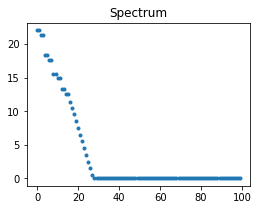

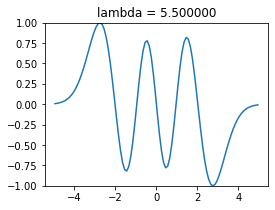

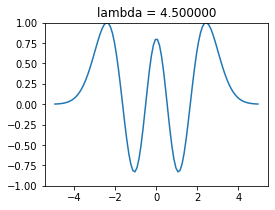

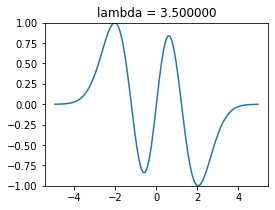

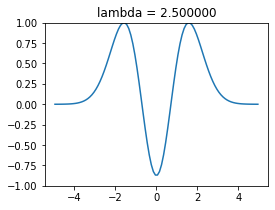

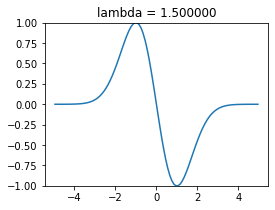

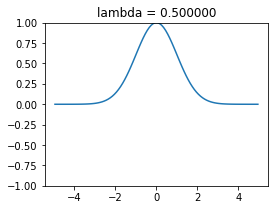

In [122]:
#%% define domain
bounds = np.array([[-5, 5]])
boxes = np.array([100])
Omega = domain.discretization(bounds, boxes)

#%% define system
h  = 1
m0 = 1
omega = 1

def c0(x):
    return m0*omega**2*x**2/2

def c2(x):
    return -h**2/(2*m0)

#%% generate data
m = 100
X = Omega.rand(m)

#%% define kernel
k = kernels.gaussianKernel(1)

#%% apply kernel generator EDMD
G_00 = kernels.gramian(X, k)
G_10 = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        G_10[i, j] = c0(X[:, i]) * k(X[:, i], X[:, j]) + np.sum( c2(X[:, i]) * k.ddiff(X[:, i], X[:, j]), axis=(0,1) )

A, _, _, _ = np.linalg.lstsq(G_00, G_10, rcond=1e-12)
d, V = algorithms.sortEig(A, evs=m, which='LM')
W = kernels.gramian2(Omega.midpointGrid(), X, k) @ V

#%% plot spectrum
plt.figure(figsize=(4, 3))
plt.plot(d, '.')
plt.title('Spectrum')

#%% plot eigenfunctions
ind, = np.where(abs(d) > 0.1)
for i in ind[-6:]:
    plt.figure(figsize=(4, 3))
    Omega.plot(np.real(W[:, i]/np.amax(abs(W[:, i]))))
    plt.ylim((-1, 1))
    plt.title('lambda = %f' % np.real(d[i]))

In [105]:
66+(13.7*73)+(5*166)-(6.8*26)

1719.3